In [1]:
import tensorflow as tf
import dataload as dataset
import matplotlib.pyplot as plt
import numpy as np
import random
from keras import layers, models, losses

In [2]:
x_train, x_test, y_train, y_test = dataset.load()

Reading images from  c:\Users\Igor García\Desktop\IGOR GARCIA\UPM\4-CUARTO CURSO\PROYECTO DE FIN DE GRADO\ReconocimientoMatriculas\English/Fnt\
img001-00001.png
img001-00002.png
img001-00003.png
img001-00004.png
img001-00005.png
img001-00006.png
img001-00007.png
img001-00008.png
img001-00009.png
img001-00010.png
img001-00011.png
img001-00012.png
img001-00013.png
img001-00014.png
img001-00015.png
img001-00016.png
img001-00017.png
img001-00018.png
img001-00019.png
img001-00020.png
img001-00021.png
img001-00022.png
img001-00023.png
img001-00024.png
img001-00025.png
img001-00026.png
img001-00027.png
img001-00028.png
img001-00029.png
img001-00030.png
img001-00031.png
img001-00032.png
img001-00033.png
img001-00034.png
img001-00035.png
img001-00036.png
img001-00037.png
img001-00038.png
img001-00039.png
img001-00040.png
img001-00041.png
img001-00042.png
img001-00043.png
img001-00044.png
img001-00045.png
img001-00046.png
img001-00047.png
img001-00048.png
img001-00049.png
img001-00050.png
img001

In [3]:
#Normalizacion de los datos
x_train = tf.pad(x_train, [[0, 0], [0,0], [0,0], [0,0]])/255
x_test = tf.pad(x_test, [[0, 0], [0,0], [0,0], [0,0]])/255

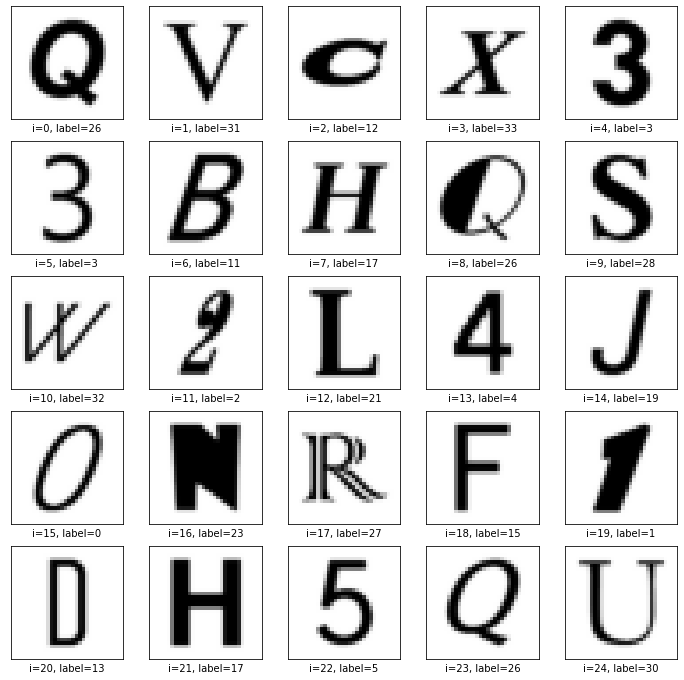

In [4]:
#Escogemos 25 imagenes de entrenamiento aleatorias
plt.figure(figsize=(12, 12))
start_index = 0
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    label = np.argmax(y_train[start_index+i])
    
    plt.xlabel('i={}, label={}'.format(start_index+i, label))
    plt.imshow(x_train[start_index+i], cmap='gray')
plt.show()

In [5]:
#Llevamos las ultimas 5000 imágenes a los datos de validación
x_val = x_train[-5000:,:,:,:] 
y_val = y_train[-5000:] 
x_train = x_train[:-5000,:,:,:] 
y_train = y_train[:-5000]

In [11]:
#Definición de la red
model = models.Sequential()
model.add(layers.Conv2D(6, 5, activation='tanh', input_shape=x_train.shape[1:]))
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(16, 5, activation='tanh'))
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(120, 5, activation='tanh'))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='tanh'))
model.add(layers.Dense(36, activation='softmax'))
model.summary()
model.compile(optimizer='adam', loss=losses.categorical_crossentropy, metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 dropout_1 (Dropout)         (None, 1, 1, 120)        

In [7]:
#Ejecución del entrenamiento
history = model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
322/322 [==============================] - 66s 13ms/step - loss: 3.4602 - accuracy: 0.0501 - val_loss: 2.6482 - val_accuracy: 0.2122
Epoch 2/50
322/322 [==============================] - 4s 11ms/step - loss: 1.9061 - accuracy: 0.4521 - val_loss: 1.1216 - val_accuracy: 0.7220
Epoch 3/50
322/322 [==============================] - 4s 12ms/step - loss: 1.1285 - accuracy: 0.6899 - val_loss: 0.8321 - val_accuracy: 0.7934
Epoch 4/50
322/322 [==============================] - 4s 13ms/step - loss: 0.9084 - accuracy: 0.7518 - val_loss: 0.6779 - val_accuracy: 0.8262
Epoch 5/50
322/322 [==============================] - 4s 13ms/step - loss: 0.7994 - accuracy: 0.7826 - val_loss: 0.6107 - val_accuracy: 0.8356
Epoch 6/50
322/322 [==============================] - 4s 13ms/step - loss: 0.7244 - accuracy: 0.7995 - val_loss: 0.5577 - val_accuracy: 0.8526
Epoch 7/50
322/322 [==============================] - 5s 14ms/step - loss: 0.6672 - accuracy: 0.8163 - val_loss: 0.5365 - val_accuracy: 0.852

In [12]:
class_weight = {
    0: 2.0, 1: 2.0, 2: 2.0, 3: 2.0, 4: 2.0, 5: 3.0, 6: 2.0, 7: 2.0, 8: 2.0, 9: 3.0, #0-9 con el doble de peso, dar mas importancia a los numeros
    10: 1.0, 11: 1.0, 12: 1.0, 13: 1.0, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 1.0,
    20: 1.0, 21: 1.0, 22: 1.0, 23: 1.0, 24: 1.0, 25: 1.0, 26: 1.0, 27: 1.0, 28: 1.0, 29: 1.0,
    30: 1.0, 31: 1.0, 32: 1.0, 33: 1.0, 34: 1.0, 35: 1.0}

In [13]:
#Ejecución del entrenamiento con pesos de clasificación
history = model.fit(x_train, y_train, class_weight= class_weight,batch_size=64, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
322/322 [==============================] - 4s 11ms/step - loss: 3.2574 - accuracy: 0.3112 - val_loss: 1.0731 - val_accuracy: 0.7438
Epoch 2/20
322/322 [==============================] - 3s 11ms/step - loss: 0.9550 - accuracy: 0.8089 - val_loss: 0.6277 - val_accuracy: 0.8438
Epoch 3/20
322/322 [==============================] - 4s 11ms/step - loss: 0.6618 - accuracy: 0.8603 - val_loss: 0.5008 - val_accuracy: 0.8750
Epoch 4/20
322/322 [==============================] - 4s 11ms/step - loss: 0.5429 - accuracy: 0.8815 - val_loss: 0.4475 - val_accuracy: 0.8830
Epoch 5/20
322/322 [==============================] - 4s 11ms/step - loss: 0.4733 - accuracy: 0.8946 - val_loss: 0.3852 - val_accuracy: 0.8978
Epoch 6/20
322/322 [==============================] - 4s 12ms/step - loss: 0.4186 - accuracy: 0.9041 - val_loss: 0.3610 - val_accuracy: 0.9012
Epoch 7/20
322/322 [==============================] - 4s 14ms/step - loss: 0.3825 - accuracy: 0.9107 - val_loss: 0.3331 - val_accuracy: 0.9060

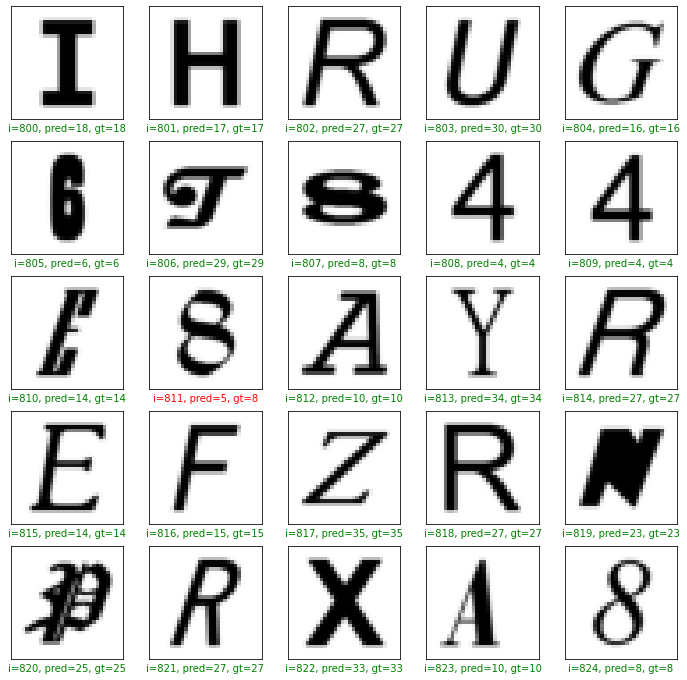

In [14]:
preds = model.predict(x_test)

plt.figure(figsize=(12, 12))
start_index = random.randint(0, 2745)
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(preds[start_index+i])
    gt = np.argmax(y_test[start_index+i])
    
    col = 'g'
    if pred != gt:
        col = 'r'
    
    plt.xlabel('i={}, pred={}, gt={}'.format(start_index+i, pred, gt), color=col)
    plt.imshow(x_test[start_index+i], cmap='gray')
plt.show()

In [9]:
val_loss, val_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nValidation accuracy:', val_acc)
print('\nValidation loss:', val_loss)

337/337 - 2s - loss: 0.0252 - accuracy: 0.9941 - 2s/epoch - 5ms/step

Validation accuracy: 0.9940547943115234

Validation loss: 0.025244349613785744


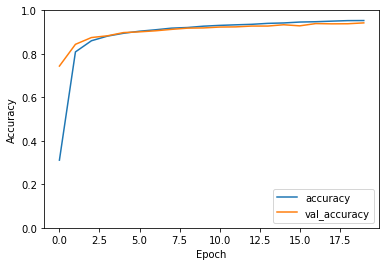

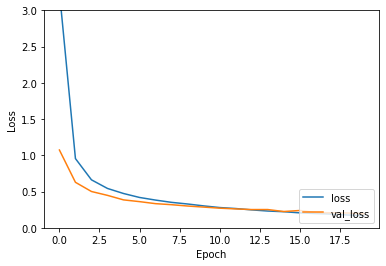

In [15]:
#Mostramos los resultados en un gráfico
plt.figure(0)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

plt.figure(1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 3])
plt.legend(loc='lower right')

In [16]:
#Guardar el modelo
model.save('/content/gdrive/My Drive/keras_model/lecturaConPesosDS3')

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/keras_model/lecturads1opti\assets
